对于梯度下降，我的理解是：在每一轮迭代中，利用损失函数相对于模型的负梯度方向的信息来对当前模型进行更新，模型以参数化的形式表示，从而模型的更新等价于参数的更新。下一个点由当前点减去当前点的梯度二来，同时为了控制更新速度，在梯度前乘以一个系数，即learning rate。

# 1、numpy和pytorch实现梯度下降法

In [1]:
%matplotlib inline

Net(
  (fc1): Linear(in_features=100, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=100, bias=True)
)


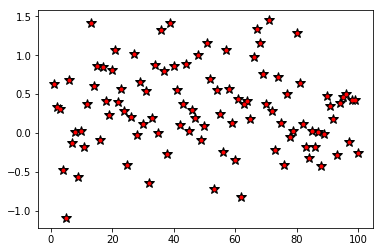

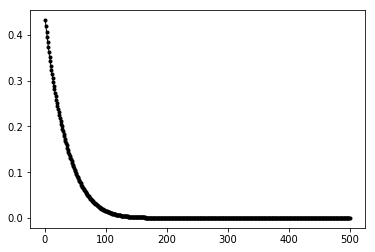

In [2]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim
import matplotlib.pyplot as plt

NUM = 100   #输入个数（输入层神经元个数）
hider_num = 300  #隐藏层神经元个数
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
 
        self.fc1 = nn.Linear(NUM,hider_num)
        self.fc2 = nn.Linear(hider_num,NUM)
 
    def forward(self,x):
        x = f.relu(self.fc1(x))
        x = self.fc2(x)
        return x

x = torch.randn(NUM)
input = Variable(x)   #随机生成NUM个数据
 
target = Variable(0.5 * x + 0.3)   #用0.5 × x + 0.3 函生成目标数据

net = Net()   #网络对象
print(net)
 
optimizer = optim.SGD(net.parameters(),lr=0.01)  #随机梯度下降优化器
loss_list =[]                                #保存loss，便于画图
step = 500                                    #迭代次数
 
for epoch in range(step):
    optimizer.zero_grad()                    #参数梯度清零，因为会累加
    out = net(input)                         #通过一次网络的输出
    loss = nn.MSELoss()(out,target)           #计算输出与target数据的均方差
    loss_list.append(loss)                    #保存loss
    loss.backward()                           #loss反向传播
    optimizer.step()                          #更新参数w，b

plt.figure(1)
plt.plot(range(1,NUM+1),target.detach().numpy().tolist(),'*',ms=10,lw=1,color='black')
plt.plot(range(1,NUM+1),out.detach().numpy().tolist(),'o',ms=3,lw=1,color='red')
plt.show()   #画出target和输出的位置图
plt.figure(2)
plt.plot(range(1,step+1),loss_list,'o-',ms=3,lw=1,color='black')
plt.show()   #画loss图

# 2、设定初始值

In [3]:
x = torch.rand(2, 2, requires_grad=True)
learning_rate =0.1 #学习率
epoches =10 #学习周期

# 3&4、求取梯度 & 在梯度方向上进行参数的更新

In [4]:
import torch
x = torch.rand(2, 2, requires_grad=True)
learning_rate =0.1 #学习率
epoches =5 #学习周期

for epoch in range(epoches):
     y = x**2+2*x+1
     y.backward(torch.ones_like(x))
     print("grad",x.grad.data) #x的梯度值
     x.data = x.data - learning_rate*x.grad.data #更新x
     x.grad.data.zero_()
print(x.data)

grad tensor([[2.4586, 3.1636],
        [2.7006, 2.5012]])
grad tensor([[1.9669, 2.5309],
        [2.1605, 2.0010]])
grad tensor([[1.5735, 2.0247],
        [1.7284, 1.6008]])
grad tensor([[1.2588, 1.6198],
        [1.3827, 1.2806]])
grad tensor([[1.0070, 1.2958],
        [1.1062, 1.0245]])
tensor([[-0.5972, -0.4817],
        [-0.5575, -0.5902]])


# 5、numpy和pytorch实现线性回归

In [5]:
import torch 
#print(torch.__version__)

# train data 
x_data= torch.arange(1.0,4.0,1.0)
x_data=x_data.view(-1,1)
y_data= torch.arange(2.0,7.0,2.0)
y_data= y_data.view(-1,1)

# 超参数设置
learning_rate=0.1
num_epoches=40

# 线性回归模型
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1,1)# 1 in and 1 out
        
    def forward(self,x):
        y_pred = self.linear(x)
        return y_pred

model = LinearRegression()

# 定义loss function损失函数和optimizer优化器
# PyTorch0.4以后，使用reduction参数控制损失函数的输出行为
criterion = torch.nn.MSELoss(reduction='mean')
# nn.Parameter - 张量的一种，当它作为一个属性分配给一个Module时，它会被自动注册为一个参数。
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

# 训练模型
for epoch in range(num_epoches):
    # forward 
    y_pred= model(x_data)
    
    #computing loss 
    loss = criterion(y_pred,y_data)
    
    print(epoch,'epoch\'s loss:',loss.item())
    
    # backward: zero gradients + backward + step
    optimizer.zero_grad()
    loss.backward()  
    optimizer.step() # 执行一步-梯度下降（1-step gradient descent）
    
# testing
x_test=torch.Tensor([4.0])
print("the result of y when x is 4:",model(x_test))
print('model.parameter:',list(model.parameters()))

0 epoch's loss: 8.379321098327637
1 epoch's loss: 0.3123200833797455
2 epoch's loss: 0.20587734878063202
3 epoch's loss: 0.19500373303890228
4 epoch's loss: 0.18572787940502167
5 epoch's loss: 0.1769055277109146
6 epoch's loss: 0.16850236058235168
7 epoch's loss: 0.16049836575984955
8 epoch's loss: 0.1528746783733368
9 epoch's loss: 0.1456129252910614
10 epoch's loss: 0.13869620859622955
11 epoch's loss: 0.13210803270339966
12 epoch's loss: 0.12583279609680176
13 epoch's loss: 0.119855597615242
14 epoch's loss: 0.11416245996952057
15 epoch's loss: 0.10873966664075851
16 epoch's loss: 0.10357439517974854
17 epoch's loss: 0.09865453094244003
18 epoch's loss: 0.09396837651729584
19 epoch's loss: 0.08950488269329071
20 epoch's loss: 0.0852532684803009
21 epoch's loss: 0.08120360225439072
22 epoch's loss: 0.07734647393226624
23 epoch's loss: 0.07367238402366638
24 epoch's loss: 0.07017296552658081
25 epoch's loss: 0.06683965027332306
26 epoch's loss: 0.06366468966007233
27 epoch's loss: 0.0

# 6、pytorch实现一个简单的神经网络

In [6]:
import torch
 
dtype = torch.float
device = torch.device("cpu")
 
# N batch_size; D_in 输入维度;
# H隐藏层维度; D_out 输出维度.
N, D_in, H, D_out = 64, 1000, 100, 10
 
# 生成数据.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)
 
# 生成权重.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)
 
learning_rate = 1e-6
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())
    #利用backward命令进行向后传播，loss.backward()将会计算所有与loss有关且requires_grad=True的变量的梯度
    #在本例中将会计算loss对w1和w2的梯度，并可由w1.grad和w2.grad获取
    loss.backward()
    #w1和w2都是requires_grad=Ture,但是在更新w1和w2的时候我们并不希望计算这一步骤的梯度
    #因此在更新w时，要用到torch.no_grad()
    #这一步也可以通过torch.optim.SGD自动实现
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        
        # 在更新完权重后，将梯度值进行重置
        w1.grad.zero_()
        w2.grad.zero_()

0 37339276.0
1 32173266.0
2 31042600.0
3 28464808.0
4 22419230.0
5 14968049.0
6 8754934.0
7 4915278.5
8 2858272.5
9 1815012.5
10 1267675.75
11 957740.75
12 763809.0
13 630301.75
14 531367.6875
15 454118.03125
16 391833.3125
17 340481.78125
18 297555.9375
19 261294.828125
20 230395.375
21 203855.46875
22 180939.140625
23 161059.265625
24 143749.625
25 128589.5078125
26 115276.234375
27 103567.65625
28 93234.8125
29 84100.59375
30 76001.4375
31 68812.7421875
32 62404.8828125
33 56675.515625
34 51542.1640625
35 46933.56640625
36 42790.19140625
37 39056.203125
38 35695.57421875
39 32657.349609375
40 29905.755859375
41 27411.2421875
42 25147.029296875
43 23089.986328125
44 21218.01171875
45 19513.357421875
46 17959.5234375
47 16541.388671875
48 15245.890625
49 14061.349609375
50 12978.9248046875
51 11987.8173828125
52 11080.0849609375
53 10247.0869140625
54 9482.283203125
55 8779.4462890625
56 8133.14697265625
57 7538.25830078125
58 6990.724609375
59 6486.1494140625
60 6021.005859375
61 559

370 0.0005208004731684923
371 0.0005041260737925768
372 0.0004887660034000874
373 0.0004745431651826948
374 0.000460501410998404
375 0.0004465484234970063
376 0.00043414757237769663
377 0.0004217565874569118
378 0.0004090385336894542
379 0.00039788481080904603
380 0.0003865223261527717
381 0.00037504968349821866
382 0.00036443924182094634
383 0.0003542876511346549
384 0.0003446405753493309
385 0.00033505988540127873
386 0.00032630187342874706
387 0.00031689958996139467
388 0.0003085143107455224
389 0.0003011942026205361
390 0.0002924320288002491
391 0.0002846772549673915
392 0.0002779839560389519
393 0.0002705492661334574
394 0.00026358410832472146
395 0.00025685917353257537
396 0.00025026145158335567
397 0.00024394251522608101
398 0.00023757883172947913
399 0.00023199839051812887
400 0.00022628196165896952
401 0.0002209479862358421
402 0.0002156805421691388
403 0.0002102191501762718
404 0.00020559021504595876
405 0.00020071497419849038
406 0.0001956498745130375
407 0.0001911672152346


在完成本次任务时，参考了如下：
- https://www.bilibili.com/video/av49008640
- https://github.com/xiaoming3526/Pytorch_learning/blob/master/Task2/README.md
- https://github.com/ZJUTSong/PyTorch_Learning/blob/master/PyTorch_2.md